# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

In [3]:
! git clone https://www.github.com/DS3001/assignment2

Cloning into 'assignment2'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 36 (delta 8), reused 5 (delta 5), pack-reused 24
Receiving objects: 100% (36/36), 5.47 MiB | 17.28 MiB/s, done.
Resolving deltas: 100% (9/9), done.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  
  **This paper is about the concept of data tidying. It defines a framework for tidy data and addresses why tidy datasets are important. Additionally, the paper will provide a case study to demonstrate the benefits of the framework.**

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

  **The "tidy data standard" was created to help make analyzing data more efficient. With the tidy data standard the process of creating data analysis tools is simplified. This enables the analyst to focus on the actaul problem at hand instead of worrying about how the data is organized.**

  3. Read the intro to section 2. What
   does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

  **The first sentence means that tidy datasets share a common structure, the way it links its physical layout with its semantics, which is much like how families have a common organization. Messy datasets can be messy in a variety of ways and could require different tecniques to make them tidy, similar to how families have their unique dynamics. The second sentence means that when looking at a specific dataset it is often easy to identify the units (observations) and tha characteristics/attributes of those units (variables), but defining what constitutes a variable or observation acorss all datasets is more difficult because there are so many different types of data and contexts.**

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

  **Values are defined as the individual pieces of informaiton that are collected. Variables and observations are how the values are organized. Variables organize values by their underlying attributes and are across units. Observations are all the values for the same unit.**

  5. How is "Tidy Data" defined in section 2.3?

  **Tidy data is defined in terms of values, variables, and observations. In a tidy dataset, columns are formed by variables, rows are formed by observations, and each type of observational unit forms a table.**

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

  **The 5 most common problems with messy datsets are: values as column headers instead of variables names, including multiple variables within a single column, storing variables in both rows and columns, including various types of observational units within a single table, and storing a single observational unit across multiple tables. The data in Table 4 is messy because the column headers are values instead of variable names. In Table 4, variables also form both the rows and columns instead of the rows being formed by observations. Melting a dataset is a process used to tidy datasets. It is when the columns are turned into rows. To accomplish this a specific list of columns that are already variables is specified and the remaining columns are transformed into two new variables called column and value. The column variable contains the repeated column headers and the value variable contains the data values that were originially stored in separate columns.**

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

  **Table 11 is messy because variables are stored in both the rows and columns. Tmax and tmin should both be variables for this dataset but are instead listed as values. The dates should also be values but in Table 11, the days of the month are used as column headers instead of using variable names as column headers. Table 12 is tidy and molten because each rows represents the measures for a single day (one unit) and the measured varibles have been converted into columns.**

  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

  **The chicken and egg problem with tidy data stems from the interdependnecy between tidy data and the tools designed to work with it. The usefullness of tidy data is dependent upon the availability of tools that can work with it. But the development of tidy tools  requires tidy data. This creates the chicken and egg situations which could lead to improvements being constrained. Wickham hopes that in the furure both statistical and congnitive factors are considered when designing tools. He hopes that a better understanding of the conginitive side of data analysis will lead to improved tools in the future.**



**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

  **To clean the 'Price' variable I started by removing any ',' so that values above 999 would be preserved. I also removed any '$' in case they were accidentally included. I then coerced the values to make the 'Price' variable a numeric data type and convert any non-numeric values to NaN. I then created a missing value dummy variable so that I could count how many missing values there are in the data. Lastly, I imputed a 0 wherever there is a missing value in the 'Price' variable.**

  **I ended up with 0 missing values.**

In [ ]:
import pandas as pd

df = pd.read_csv('./assignment2/data/airbnb_hw.csv', low_memory=False)

df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].str.replace('$','')

df['Price'] = pd.to_numeric(df['Price'])

df['Price_nan'] = df['Price'].isnull();
df['Price'].fillna(0)

print('Total Missings: \n', sum(df['Price_nan']),'\n')

2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.

In [ ]:
import pandas as pd

df = pd.read_csv('./assignment2/data/sharks.csv', low_memory=False)



3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./assignment2/data/college_completion.csv', low_memory=False) #1

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

  **The dimensions of the data are 3798 x 63, therefore there are 3798 observations in the dataset. The variables included in the dataset are printed in a list from the code below.**

In [5]:
print(df.shape, '\n') #Dimensions: 3798 x 63
print(df.columns.tolist(), '\n') #Variables included in the dataset
print(df.head(), '\n')

(3798, 63) 

['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer', 'vsa_enroll_after4_t

3. Cross tabulate `control` and `level`. Describe the patterns you see.

  **There are not significant differences between the number of 2 year private for-profit schools and public schools and 4 year private for-profit schools and public schools. But, there is a much greater amount of 4 year schools that are private not-for-profit than there are 2 year private not-for-profit schools.**


In [ ]:
#3
print(pd.crosstab(df['control'], df['level']))

4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.


count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


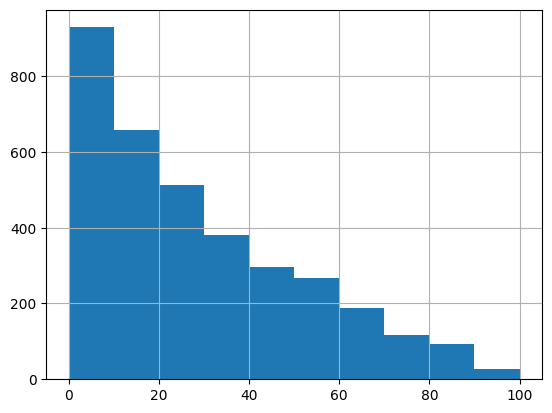

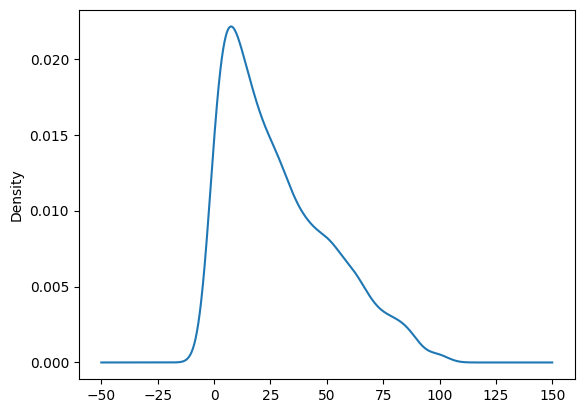

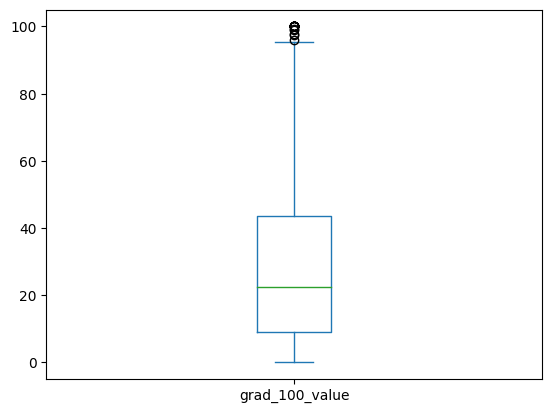

In [6]:
var = 'grad_100_value'
plt.figure()
df[var].hist() #Creating a histogram
plt.figure()
df[var].plot.density() #Creating a Kernel Desnsity Plot
plt.figure()
df[var].plot.box() #Creating a boxplot
print(df[var].describe())

5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?

**From the control density graph it can be seen that public institutions have the highest density at lower lower graduation rates, while private not-for-profit graphs have higher density at higher graduation rates. The levels density graph shows a higher density at higher graduation rates for 4 year institutions. From the statistical desciptions it can be seen that private not-for-profit and 4 year institutions have the have the highest graduation rate.**

                       grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8  
       grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   

<Figure size 640x480 with 0 Axes>

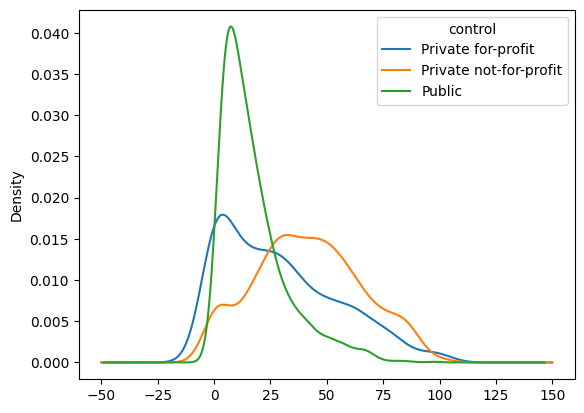

<Figure size 640x480 with 0 Axes>

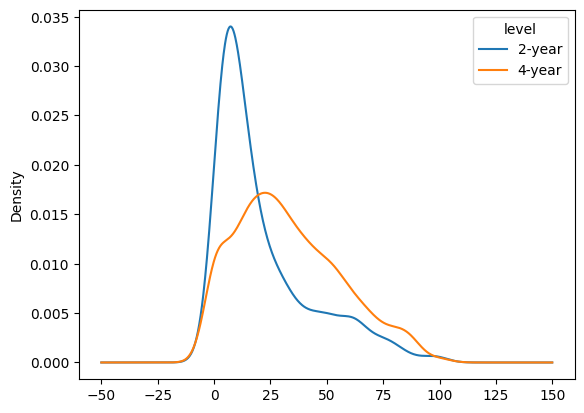

In [7]:
group_by1 = 'control'
group_by2 = 'level'
plt.figure()
df_wide = df.pivot(columns=group_by1, values=var)
df_wide.plot.density()
print(df.loc[:,[group_by1,var]].groupby(group_by1).describe())
plt.figure()
df_wide = df.pivot(columns=group_by2, values=var)
df_wide.plot.density()
print(df.loc[:,[group_by2,var]].groupby(group_by2).describe())

6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

**From the graph it appears that 4 year private not-for-profit, 2 year private not-for-profit and 2 year private for-profit institutions have the best graduations rates.**

<Axes: ylabel='Density'>

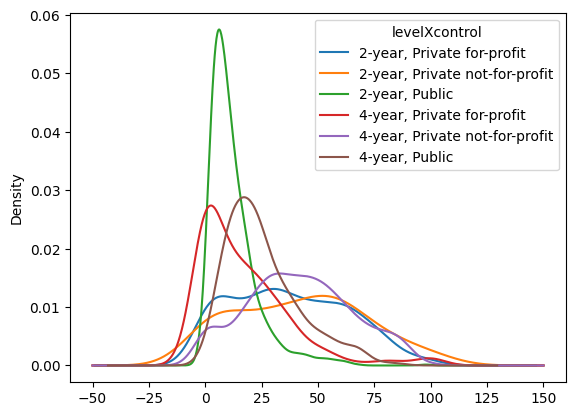

In [ ]:
df['levelXcontrol']=df['level']+', '+df['control']
group_by = 'levelXcontrol'
df_wide = df.pivot(columns=group_by, values=var)
df_wide.plot.density()

7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.

**The second peak in the density graph at around 10,000 comes from the higher density at higher aid values from private not-for-profit schools.**

                       aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0  
       aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                  

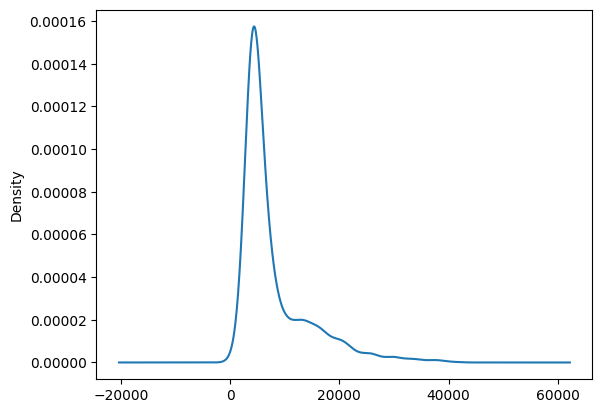

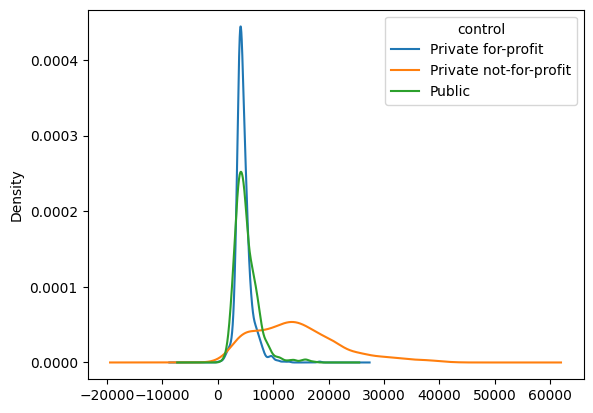

<Figure size 640x480 with 0 Axes>

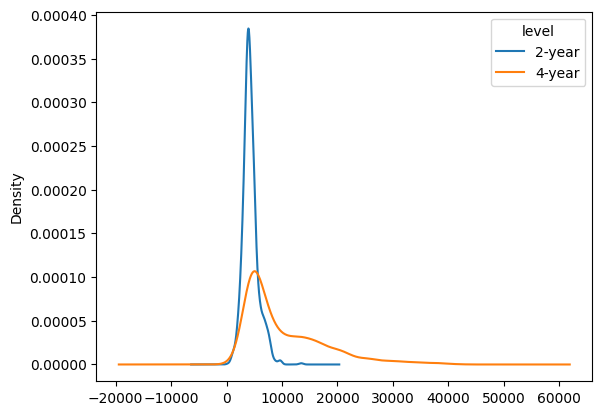

In [8]:
var2 = 'aid_value'
plt.figure()
df[var2].plot.density()
plt.figure
df_wide = df.pivot(columns=group_by1, values=var2)
df_wide.plot.density()
print(df.loc[:,[group_by1,var2]].groupby(group_by1).describe())
plt.figure()
df_wide = df.pivot(columns=group_by2, values=var2)
df_wide.plot.density()
print(df.loc[:,[group_by2,var2]].groupby(group_by2).describe())

8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Higher aid values increases graduation rates for 2 year and private not-for-profit institutions.**

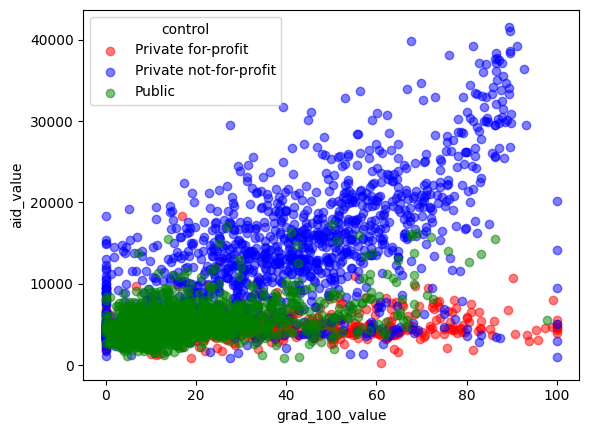

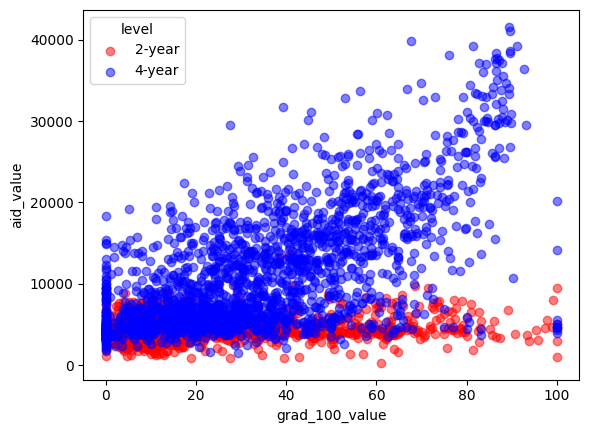

In [12]:
unique_values = df[group_by1].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_values)))
color_map = {'Private for-profit': 'red', 'Private not-for-profit': 'blue', 'Public': 'green'}

fig, ax = plt.subplots()

# Loop through the unique values in the group_by1 column
for value, color in color_map.items():
    subset = df[df[group_by1] == value]
    ax.scatter(subset[var], subset[var2], label=value, color=color, alpha=0.5)

ax.set_xlabel(var)
ax.set_ylabel(var2)
ax.legend(title=group_by1)

unique_values = df[group_by2].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_values)))
color_map = {'2-year': 'red', '4-year': 'blue'}

fig, ax = plt.subplots()

# Loop through the unique values in the group_by1 column
for value, color in color_map.items():
    subset = df[df[group_by2] == value]
    ax.scatter(subset[var], subset[var2], label=value, color=color, alpha=0.5)

ax.set_xlabel(var)
ax.set_ylabel(var2)
ax.legend(title=group_by2)

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.